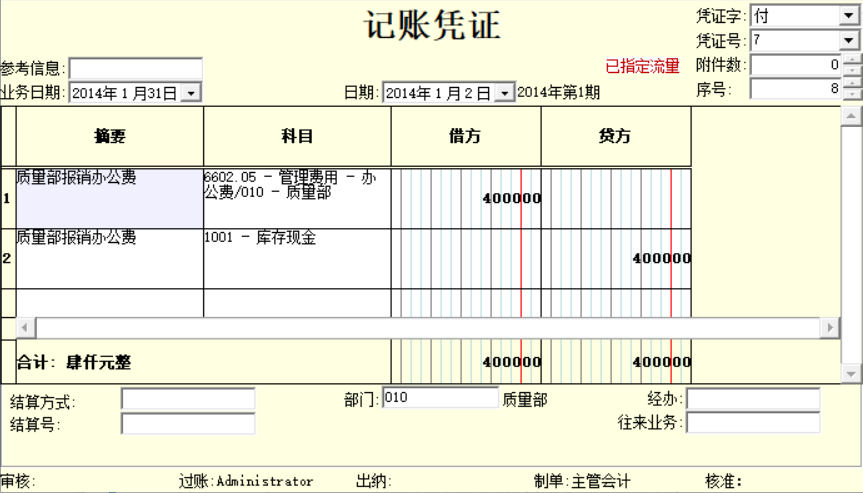

In [36]:
def getaccount(account_):  # 传入的科目编码
    """得到输入明细科目编码对应的 【科目名称】--- 含科目是否明细检验"""

    import pandas as pd
    account_s = pd.read_excel(r'科目表.xlsx',index_col=0)



    # account_ = input("请输入正确的科目编码：")
    if account_[0].isdigit():
        # 输入的是科目编码
        dt_account = account_s.loc[account_s.index==account_]

        if not dt_account['name'][0]:
            print("没有找到该会计科目！")
            return 0
        else:
            if not dt_account['detailed'][0]:
                print("请输入明细科目")
                return 0
            else:
                return dt_account['name'][0]

In [45]:
def input_rec():
    """输入会计记账凭证，确认或存储"""
    
    rec_master = {}   # 记账凭证主记录
    rec_details = []   # 记账凭证详细分录
    
    import time

    print("当前日期：",time.strftime("%Y-%m-%d", time.localtime()))
    #当前日期作为凭证日期，月份为会计期间
    rec_master["date"]=time.strftime("%Y-%m-%d", time.localtime())
    print("当前会计期间：",time.strftime("%m", time.localtime()))
    rec_master["period"]=time.strftime("%m", time.localtime())
    
    rec_master["sn"] = input("请输入记账凭证编号：")
     
    
    
    # rec_detail = []   # 凭证分录列标
    
    i=1       #分录计数器
    
    
    #分录数量 计数器
    rec_master["item_n"] = 1   # 该凭证的分录数量
    
    flag ="y"          # 分录是否输入完成
    rec_detail = {}    #  每个分录
    while flag == "y" or flag == "Y":
    
               
        rec_detail["sn"] = rec_master["sn"]   # 分录的记账凭证编码
        
        rec_detail["item"] = str(rec_master["item_n"])   # 分录序号

        print(f'请输入第{rec_master["item_n"]}条分录')
        
        rec_detail["describe"] = input("摘要：") .strip(' ')    # 输入对应分录的摘要
     
        while True:
            rec_detail["code"] = input("科目编码：") .strip(' ')
            account_name = getaccount(rec_detail["code"])              #得到科目名称，和是否为明细可枚举
            if account_name == 0:
                print("不符合要求，请重新输入")
                
            else:
                print(f"您输入的科目名称为：{account_name}")
                
                break
        
        
        rec_detail["DrCr"] = input("记账方向 [借/贷]：") .strip(' ')
        
        while True:
            rec_detail["amount"] = input("金额：")
            if rec_detail["amount"].isdigit():
                rec_detail["amount"] = round(float(rec_detail["amount"]),2)
                break
            else:
                print("请输入正确的数据！")

        #  把凭证分录加到凭证列标中
        rec_details.append(rec_detail) 
        
        flag = input("需要增加分录y/n") 
        
        if flag == "y" or flag == "Y":
            rec_master["item_n"] += 1 # 该记账凭证的分录数
            
            # 清空字典
            rec_detail = {}
        else:
            pass
    
    return rec_master,rec_details   #前者是字典，后者是包含分录字典的列标



In [46]:
rec_master,rec_details = input_rec() 

当前日期： 2022-10-25
当前会计期间： 10
请输入记账凭证编号：1001
请输入第1条分录
摘要：费用报销
科目编码：6602.01
您输入的科目名称为：管理费用_开办费
记账方向 [借/贷]：借
金额：2000
需要增加分录y/ny
请输入第2条分录
摘要：费用报销
科目编码：1002.01.01
您输入的科目名称为：银行存款_人民币存款_中行高新区支行
记账方向 [借/贷]：贷
金额：2000
需要增加分录y/nn


In [132]:
 def write_to_rec():
        
        """ 把键入的会计记账凭证存储到   rec.xlsx(主记录文件) 和recs.xlsx（明细记录文件）"""
        
        rec_master,rec_details = input_rec() 
        
        # 主记录
        rec_master["recording"] = "GL_accountant"   #凭证录入人员
        rec_master["examing"] = None                 #凭证审核人员   
        rec_master["posting"] = None                # 凭证过账人员

        # df_master = pd.DataFrame(data=[rec_master.values(),], index=[rec_master['sn'],], columns = rec_master.keys())
        df_master = pd.DataFrame(data=[rec_master.values(),], index=None, columns = rec_master.keys())

        # df_masters = pd.read_excel(r'rec_master.xlsx',index_col=["sn"])
        df_masters = pd.read_excel(r'rec_master.xlsx',index_col=None)
        df_masters = df_masters.append(df_master,ignore_index=True)
        # mode='a'   非新增 工作表
        """with pd.ExcelWriter("test.xlsx", mode='a', engine="openpyxl") as writer: 
             df.to_excel(writer) 
             """
        with pd.ExcelWriter('rec_master.xlsx',engine="openpyxl") as writer:  
            df_masters.to_excel(writer, sheet_name='会计分录序时簿',index=False)  # 不写入索引
            
        # 明细记录 
        df_details = pd.DataFrame(data=[rec_details[0].values(),], index=None, columns = rec_details[0].keys())
 
        for i in range(1,rec_master["item_n"]):
            
            df_details =df_details.append(pd.DataFrame(data=[rec_details[i].values(),], index=None, columns = rec_details[i].keys()),
                                         ignore_index=True) 
        
        with pd.ExcelWriter('rec_detail.xlsx',engine="openpyxl") as writer:  
            df_details.to_excel(writer, sheet_name='详细分录序时簿',index=False)  # 不写入索引
        
            
        


In [139]:
df_details

,sn,item,describe,code,DrCr,amount
0,1001,1,费用报销,6602.01,借,2000.0


In [140]:
for i in range(1,rec_master["item_n"]):
            
    df_details =df_details.append(pd.DataFrame(data=[rec_details[i].values(),], index=None, columns = rec_details[i].keys()),
                                         ignore_index=True) 

In [141]:
df_details

,sn,item,describe,code,DrCr,amount
0,1001,1,费用报销,6602.01,借,2000.0
1,1001,2,费用报销,1002.01.01,贷,2000.0


In [142]:
with pd.ExcelWriter('rec_detail.xlsx',engine="openpyxl") as writer:  
            df_details.to_excel(writer, sheet_name='详细分录序时簿',index=False)  # 不写入索引

In [137]:
list(range(1,2))

[1]

In [133]:
df_masters

,date,period,sn,item_n,recording,examing,posting
0,2022-10-25,10,1001,2,GL_accountant,None,None


In [126]:
with pd.ExcelWriter('rec_master.xlsx',
                    mode='a',engine="openpyxl") as writer:  
    df_master.to_excel(writer, sheet_name='会计分录序时簿',index=False)  # 不写入索引

In [80]:
df_master = pd.DataFrame(data=[rec_master.values(),], index=[rec_master['sn'],], columns = rec_master.keys())

date	period	sn	recording	examing	posting	item_n


In [81]:
df_master

,date,period,sn,item_n
1001,2022-10-25,10,1001,2


In [56]:
acc_rec =pd.Series(rec_master,index=[acc_rec['sn'],])

In [57]:
acc_rec

1001    NaN
dtype: object

In [ ]:
acc_rec.to_excel

In [54]:
acc_rec

date      2022-10-25
period            10
sn              1001
item_n             2
dtype: object

In [ ]:
'''
import pandas as pd
# create dataframe
info_marks = pd.DataFrame({'name': ['Parker', 'Smith', 'William', 'Terry'],
                           'Maths': [78, 84, 67, 72],
                           'Science': [89, 92, 61, 77],
                           'English': [72, 75, 64, 82]})

# render dataframe as html
writer = pd.ExcelWriter('output.xlsx')
info_marks.to_excel(writer)
writer.save()
print('DataFrame is written successfully to the Excel File.')
'''